In [64]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.stats import norm 

# Problem 1 (LDA)
## (a)、(b)

In [90]:
y1 = np.array([[-0.4, 0.58, 0.089], [-0.31, 0.27, -0.04], [0.38, 0.055, -0.035], [-0.15, 0.53, 0.011], [-0.35, 0.47, 0.034],
               [0.17, 0.69, 0.1], [-0.011, 0.55, -0.18], [-0.27, 0.61, 0.12], [-0.065, 0.49, 0.0012], [-0.12, 0.054, -0.063]])
y2 = np.array([[0.83, 1.6, -0.014], [1.1, 1.6, 0.48], [-0.44, -0.41, 0.32], [0.047, -0.45, 1.4], [0.28, 0.35, 3.1],
               [-0.39, -0.48, 0.11], [0.34, -0.079, 0.14], [-0.3, -0.22, 2.2], [1.1, 1.2, -0.46], [0.18, -0.11, -0.49]])
  
y1_mean = np.array([np.mean(y1, 0)]) 
y1_tmp = y1 - y1_mean
y1_std = y1_tmp.T
y1_dot = y1_std.dot(y1_std.T)

y2_mean = np.array([np.mean(y2, 0)])
y2_tmp = y2 - y2_mean
y2_std = y2_tmp.T
y2_dot = y2_std.dot(y2_std.T)
 
v = inv((y1_dot + y2_dot) / 10).dot((y1_mean - y2_mean).T)
print('v = ',v)
samples = np.linspace(y2.min(), y2.max(), 100)
x, y, z = v[0] * samples, v[1] * samples, v[2] * samples
 

v =  [[-3.83246075]
 [ 2.1374852 ]
 [-0.76736865]]


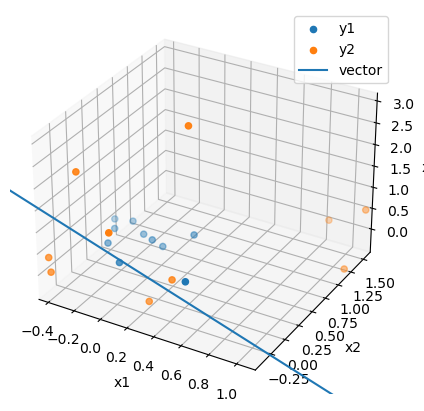

In [89]:
# display
plt.figure(figsize = (5, 5))
ax = plt.axes(projection = "3d")
ax.scatter(y1[:, 0], y1[:, 1], y1[:, 2], label = 'y1')
ax.scatter(y2[:, 0], y2[:, 1], y2[:, 2], label = 'y2')
ax.set_xlim(y2[:, 0].min(), y2[:, 0].max())
ax.set_xlabel('x1')
ax.set_ylim(y2[:, 1].min(), y2[:, 1].max())
ax.set_ylabel('x2')
ax.set_zlim(y2[:, 2].min(), y2[:, 2].max())
ax.set_zlabel('x3')
# vector
ax.plot(x, y, z, label = 'vector')
ax.legend()
plt.show()

## (c)

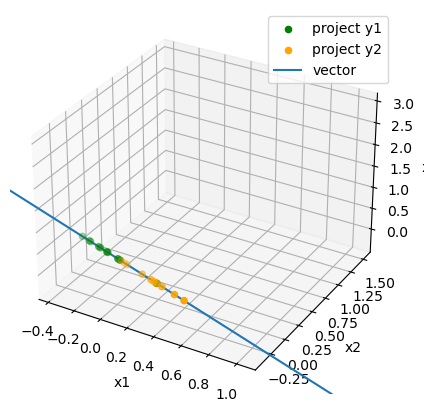

In [71]:
y1_project = y1.dot(v) / (np.linalg.norm(v) ** 2) * v.T
y2_project = y2.dot(v) / (np.linalg.norm(v) ** 2) * v.T

# display
plt.figure(figsize = (5, 5))
ax = plt.axes(projection = "3d")
ax.scatter(y1_project[:, 0], y1_project[:, 1], y1_project[:, 2], c = 'green', label = 'project y1')
ax.scatter(y2_project[:, 0], y2_project[:, 1], y2_project[:, 2], c = 'orange', label = 'project y2')
ax.set_xlim(y2[:, 0].min(), y2[:, 0].max());ax.set_xlabel('x1')
ax.set_ylim(y2[:, 1].min(), y2[:, 1].max());ax.set_ylabel('x2')
ax.set_zlim(y2[:, 2].min(), y2[:, 2].max());ax.set_zlabel('x3')
ax.plot(x, y, z, label = 'vector')
ax.legend()
plt.show()

## (d)

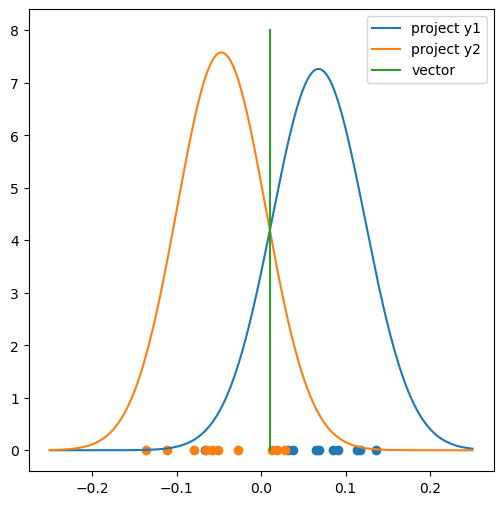

Decision boundary =  0.010469182325657217


In [158]:
y1_sca = y1.dot(v) / (np.linalg.norm(v) ** 2)
y2_sca = y2.dot(v) / (np.linalg.norm(v) ** 2)

samples = np.linspace(-0.25, 0.25, 1000)
y1_g = norm.pdf(samples, norm.fit(y1_sca)[0], norm.fit(y1_sca)[1])
y2_g = norm.pdf(samples, norm.fit(y2_sca)[0], norm.fit(y2_sca)[1])

# display
plt.figure(figsize = (6, 6))
plt.scatter(y1_sca, np.zeros(10))
plt.scatter(y2_sca, np.zeros(10))
plt.plot(samples, y1_g, label = 'project y1')
plt.plot(samples, y2_g, label = 'project y2')
mean = (np.mean(scalar_y1) + np.mean(scalar_y2)) / 2
plt.plot(np.ones(10)*mu, np.linspace(0, 8, 10), label = 'vector')
plt.legend()
plt.show()
print('Decision boundary = ', mean)


# (e)

In [88]:
tmp = 0
for i in range(len(y1_sca)):
    if y1_sca[i] < mean:
            tmp = tmp + 1
    if y2_sca[i] > mean:
            tmp = tmp + 1
print('Training error = ',  tmp / 20)

Training error =  0.2


# Problem 2
## (a)

In [119]:
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [152]:
# load data
file = open('06HW1_iris.csv', newline = '')
reader = csv.reader(file)
iris_data = []
iris_target = []
dic_names = { 'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

for r in reader:
    if r != []:
        iris_data.append(r[0 : 4])
        iris_target.append(dic_names[r[-1]]) 
        
file.close()
iris_data = np.array(iris_data)


explained_variance = [0.7277045209380135, 0.9580097536148199, 0.9948480731910938, 1.0000000000000002]


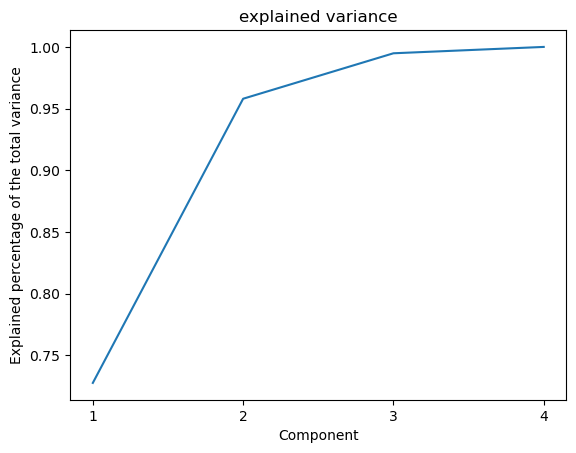

In [174]:
# PCA
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)
pca = PCA(n_components = 4)
pcs = pca.fit_transform(iris_scaled)
variance = []
sum = 0
for i in pca.explained_variance_ratio_:
    sum = sum +1
    variance.append(sum)
print('explained_variance =', explained_variance)

plt.figure()
plt.plot([1, 2, 3, 4], explained_variance)
plt.xticks([1, 2, 3, 4],['1', '2', '3', '4'])
plt.xlabel('Component');plt.ylabel('Explained percentage of the total variance')
plt.title('explained variance')
plt.show()

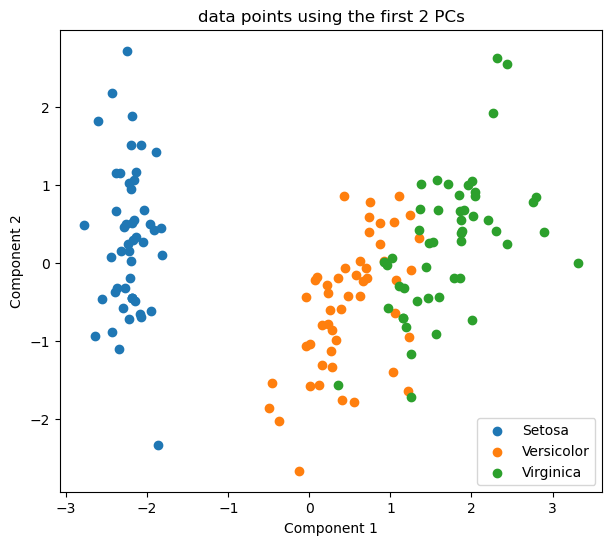

In [161]:
# display
plt.figure(figsize = (7, 6))
plt.scatter(pcs[0:50, 0], pcs[0:50, 1], label = 'Setosa')
plt.scatter(pcs[50:100, 0], pcs[50:100, 1], label = 'Versicolor')
plt.scatter(pcs[100:150, 0], pcs[100:150, 1], label = 'Virginica')
plt.xlabel('Component 1');plt.ylabel('Component 2')
plt.title('data points using the first 2 PCs')
plt.legend()
plt.show()

## (b)(1)、(2)

In [184]:
xtrain1 = rawdata_normal[0:30];xtest1 = rawdata_normal[30:50]
ytrain1 = label[0:30];ytest1 = label[30:50]
xtrain2 = rawdata_normal[50:80];xtest2 = rawdata_normal[80:100]
ytrain2 = label[50:80];ytest2 = label[80:100]
xtrain3 = rawdata_normal[100:130];xtest3 = rawdata_normal[130:150]
ytrain3 = label[100:130];ytest3 = label[130:150]
xtraining = np.concatenate((xtrain1, xtrain2, xtrain3), axis=0)
ytraining = np.concatenate((ytrain1, ytrain2, ytrain3), axis=0)
xtest = np.concatenate((xtest1, xtest2, xtest3), axis=0)
ytest = np.concatenate((ytest1, ytest2, ytest3), axis=0)

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression


lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(xtraining,ytraining)
X_new = lda.fit_transform(rawdata_normal, label)
train_pre = lda.predict(xtraining)
test_pre = lda.predict(xtest)
train_error = 0
test_error = 0
for i in range(len(train_pre)):
    if train_pre[i] != ytraining[i]:
        train_error += 1
for i in range(len(test_pre)):
    if test_pre[i] != ytest[i]:
        test_error += 1

print('Training error = ', train_error/len(train_pre))
print('Test error = ', test_error/len(train_pre))

Training error =  0.011111111111111112
Test error =  0.022222222222222223


C:\Users\dinci\AppData\Local\Temp\ipykernel_3756\328092527.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


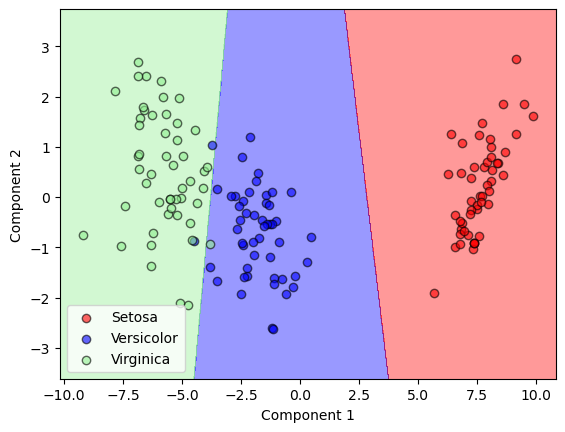

In [189]:
def decision_regions(X, y, classifier, resolution = 0.02):

    # setup marker generator and color map
    markers = ('o', 'o', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cla = ('Setosa', 'Versicolor', 'Virginica')
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.6,
                    c = cmap(idx),
                    edgecolor='black',
                    marker = markers[idx], label = cla[idx])
    plt.legend()
    plt.xlabel('Component 1');plt.ylabel('Component 2')
for i in range(len(label)):
    if label[i] =='Iris-setosa':
        label1[i] = 1
    elif label[i] =='Iris-versicolor':
        label1[i] = 2
    else:
        label1[i] = 3

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(rawdata_normal, label1)
lr = LogisticRegression()
lr = lr.fit(X_train_lda, label1)

decision_regions(X_train_lda, label1, classifier=lr)

## (b)(2)

In [181]:
xtrain1 = X_r[0:30];xtest1 = X_r[30:50];ytrain1 = label[0:30];ytest1 = label[30:50]
xtrain2 = X_r[50:80];xtest2 = X_r[80:100];ytrain2 = label[50:80];ytest2 = label[80:100];
xtrain3 = X_r[100:130];xtest3 = X_r[130:150];ytrain3 = label[100:130];ytest3 = label[130:150];
xtraining = np.concatenate((xtrain1, xtrain2, xtrain3), axis=0);ytraining = np.concatenate((ytrain1, ytrain2, ytrain3), axis=0);
xtest = np.concatenate((xtest1, xtest2, xtest3), axis=0);ytest = np.concatenate((ytest1, ytest2, ytest3), axis=0)

In [182]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis(n_components=2)
lda1.fit(xtraining,ytraining)
X_new = lda1.fit_transform(X_r, label)
train_pre1 = lda1.predict(xtraining)
test_pre1 = lda1.predict(xtest)
train_error = 0
test_error = 0
for i in range(len(train_pre1)):
    if train_pre1[i] != ytraining[i]:
        train_error += 1
for i in range(len(test_pre)):
    if test_pre1[i] != ytest[i]:
        test_error += 1
print('Training error(with PCA) = ', train_error/len(train_pre))
print('Test error(with PCA) = ', test_error/len(train_pre))

Training error(with PCA) =  0.011111111111111112
Test error(with PCA) =  0.022222222222222223


C:\Users\dinci\AppData\Local\Temp\ipykernel_3756\2536176260.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],


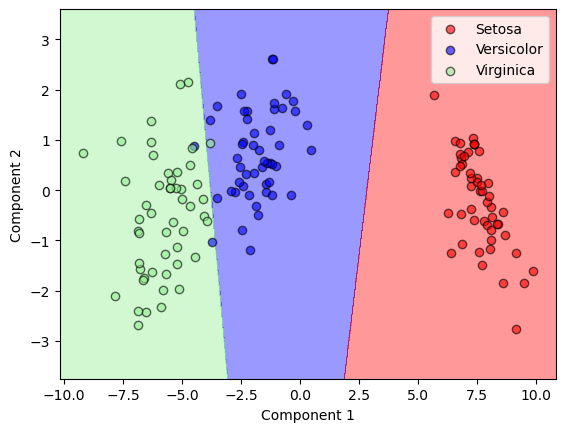

In [191]:
def decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'o', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cla = ('Setosa', 'Versicolor', 'Virginica')
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.6,
                    c = cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label = cla[idx])
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_r, label1)
lr = LogisticRegression()
lr = lr.fit(X_train_lda, label1)

plot_decision_regions(X_train_lda, label1, classifier=lr)

## (b)(3)
test和traning的誤差皆相當相近，但和所繪製的結果不相同，可能是因為在Iris dataset上，利用PCA+LDA或許並沒有太大的效果，並且計算速度上也沒有提升或是降低太多